In [73]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw = pd.read_csv('datasets/BBC_recipe_data.csv')

In [3]:
raw.head()

,cook_time,cuisine,ingredients,ingredients_full,name,prep_time,rating,rating_count,servings
0,30 mins to 1 hour,African,"peppers,sweet potatoes,red onions,cherry tomat...","2 large red or orange peppers, de-seeded and c...",Moroccan-style roasted veg,less than 30 mins,3.888889,9,Serves 2
1,10 to 30 mins,African,"basmati rice,vegetable oil,chicken thighs,onio...","300g/10½oz basmati rice,1 tbsp vegetable oil,8...",Jollof rice with chicken,less than 30 mins,3.470588,17,Serves 4
2,30 mins to 1 hour,African,"ground ginger,garlic,chilli,thyme,cinnamon,nut...","30g/1oz ground ginger ,30g/1oz garlic granules...",Jollof Quorn pilau with salted cucumber,less than 30 mins,3.200000,5,Serves 4
3,30 mins to 1 hour,Irish,"mashed potato,potatoes,plain flour,milk,butter...","250g/9oz colcannon or mashed potato,250g/9oz p...",Boxty with mackerel,less than 30 mins,5.000000,1,Serves 4
4,30 mins to 1 hour,Indian,"vegetable oil,onion,sea salt,garlic,cumin,cori...","1 tbsp vegetable oil,1 large onion, thinly sli...",Mixed vegetable and almond biryani,less than 30 mins,2.223214,112,Serves 4


In [19]:
raw.shape

(1773, 9)

In [4]:
raw.isna().sum()

cook_time           0
cuisine             0
ingredients         0
ingredients_full    0
name                0
prep_time           0
rating              0
rating_count        0
servings            6
dtype: int64

In [5]:
raw[raw['servings'].isna()]

,cook_time,cuisine,ingredients,ingredients_full,name,prep_time,rating,rating_count,servings
138,1 to 2 hours,North African,"vegetable oil,lamb chops,onion,saffron,ground ...","2 tbsp vegetable oil ,500g/1lb 2oz lamb chops,...",Harira soup,less than 30 mins,2.333333,3,NaN
595,30 mins to 1 hour,French,"olive oil,globe artichoke,monkfish,pancetta,sh...","5 tbsp olive oil,1 fresh globe artichoke, hear...",Monkfish Bourguignon,less than 30 mins,5.000000,1,NaN
770,30 mins to 1 hour,British,"plain flour,eggs,wholegrain mustard,milk,beef ...","225g/8oz plain flour,8 free-range eggs,1 tbsp ...",Classic toad in the hole,overnight,5.000000,3,NaN
1051,over 2 hours,Japanese,"soy sauce,mirin,teriyaki sauce,sugar,pork bell...","175ml/6fl oz dark soy sauce,120ml/4fl oz sake,...",Chashu (Japanese braised pork),less than 30 mins,5.000000,1,NaN
1187,30 mins to 1 hour,Indian,"cumin,coriander seeds,fennel seeds,fenugreek,v...","1 tsp cumin seeds,1 tsp coriander seeds,1 tsp ...",Prawn dopiaza,less than 30 mins,5.000000,3,NaN
1253,10 to 30 mins,Indian,"yoghurt,rice vinegar,ginger,garlic,chilli powd...","150g/5½oz Greek yoghurt,2 tbsp rice vinegar,3c...",Indian fried chicken,over 2 hours,5.000000,3,NaN


In [171]:
raw['cuisine'].value_counts(normalize=True) * 100

Italian                       20.135364
British                       19.966159
Indian                        12.633954
Thai and South-East Asian      6.937394
French                         6.542583
Chinese                        6.204174
American                       4.850536
Mexican                        3.666103
North African                  2.763677
Turkish and Middle Eastern     2.538071
Caribbean                      2.143260
Spanish                        2.143260
Greek                          1.804851
East European                  1.748449
Japanese                       1.579244
African                        0.958827
Pakistani                      0.846024
Nordic                         0.733221
Korean                         0.564016
Irish                          0.507614
Portuguese                     0.394811
South American                 0.338409
Name: cuisine, dtype: float64

# DATA CLEANING

In [30]:
raw.servings.value_counts()

Serves 4                               861
Serves 2                               224
Serves 6                               192
Serves 4-6                             112
Serves 6-8                              49
                                      ... 
Serves 3-4 (makes two large pizzas)      1
Serves 4 (or makes 6 macaroni cups)      1
Makes 6-8                                1
Serves 4, plus 3-4 jars piccalilli       1
Makes 8–10 large skewers                 1
Name: servings, Length: 86, dtype: int64

In [31]:
servings.value_counts()

Serves 4                               861
Serves 2                               224
Serves 6                               192
Serves 4-6                             112
Serves 6-8                              49
                                      ... 
Serves 3-4 (makes two large pizzas)      1
Serves 4 (or makes 6 macaroni cups)      1
Makes 6-8                                1
Serves 4, plus 3-4 jars piccalilli       1
Makes 8–10 large skewers                 1
Name: servings, Length: 86, dtype: int64

In [61]:
servings = raw.servings

servings_c = servings.str.replace(r'[A-Za-z ]', '')
#servings_c = servings.str.extract(r'([\d])')

In [63]:
raw.servings = servings_c

In [68]:
for column in raw.columns:
    print("---- %s ---" % column)
    print(raw[column].value_counts())

---- cook_time ---
10 to 30 mins          643
30 mins to 1 hour      492
1 to 2 hours           269
over 2 hours           255
less than 10 mins      107
no cooking required      7
Name: cook_time, dtype: int64
---- cuisine ---
Italian                       357
British                       354
Indian                        224
Thai and South-East Asian     123
French                        116
Chinese                       110
American                       86
Mexican                        65
North African                  49
Turkish and Middle Eastern     45
Caribbean                      38
Spanish                        38
Greek                          32
East European                  31
Japanese                       28
African                        17
Pakistani                      15
Nordic                         13
Korean                         10
Irish                           9
Portuguese                      7
South American                  6
Name: cuisine, dtype: in

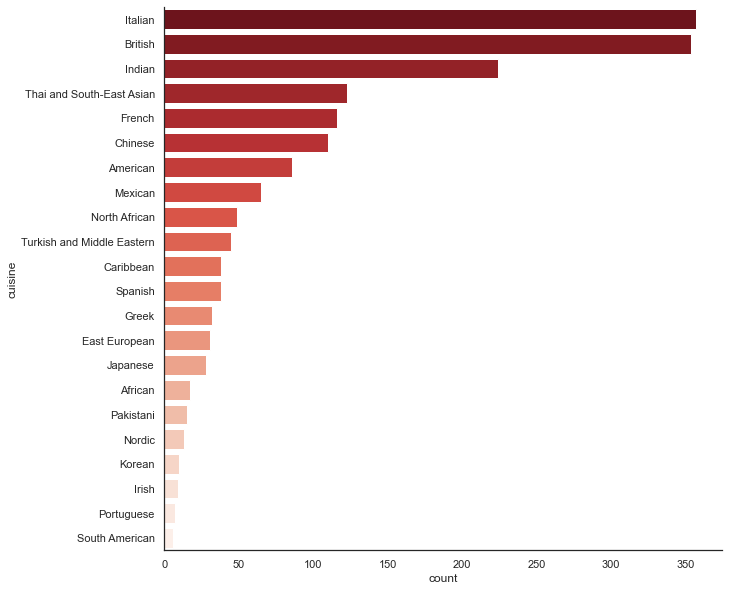

In [80]:
cuisines_n = raw.cuisine.value_counts()

size = (10,10)
fig, ax = plt.subplots(1, 1, figsize = size)

sns.set_theme(style = "white")

ax = sns.countplot(y = 'cuisine', data = raw, palette="Reds_r", order = raw['cuisine'].value_counts().index)
sns.despine()


In [172]:
raw['cuisine'].value_counts(normalize=True) * 100

Italian                       20.135364
British                       19.966159
Indian                        12.633954
Thai and South-East Asian      6.937394
French                         6.542583
Chinese                        6.204174
American                       4.850536
Mexican                        3.666103
North African                  2.763677
Turkish and Middle Eastern     2.538071
Caribbean                      2.143260
Spanish                        2.143260
Greek                          1.804851
East European                  1.748449
Japanese                       1.579244
African                        0.958827
Pakistani                      0.846024
Nordic                         0.733221
Korean                         0.564016
Irish                          0.507614
Portuguese                     0.394811
South American                 0.338409
Name: cuisine, dtype: float64

In [142]:
ratings = raw.groupby('cuisine').agg({'rating': [np.nanmean],
                           'rating_count': [np.nansum]})

In [143]:
ratings.columns = ratings.columns.droplevel()
ratings.reset_index(inplace = True)
ratings.columns = ['Cuisine', 'Average Rating', 'Number of ratings']
ratings

,Cuisine,Average Rating,Number of ratings
0,African,4.454479,80
1,American,4.648867,908
2,British,4.459277,3629
3,Caribbean,4.578989,188
4,Chinese,4.561886,1008
5,East European,4.720223,267
6,French,4.563308,791
7,Greek,4.508476,536
8,Indian,4.434341,2840
9,Irish,4.437608,56


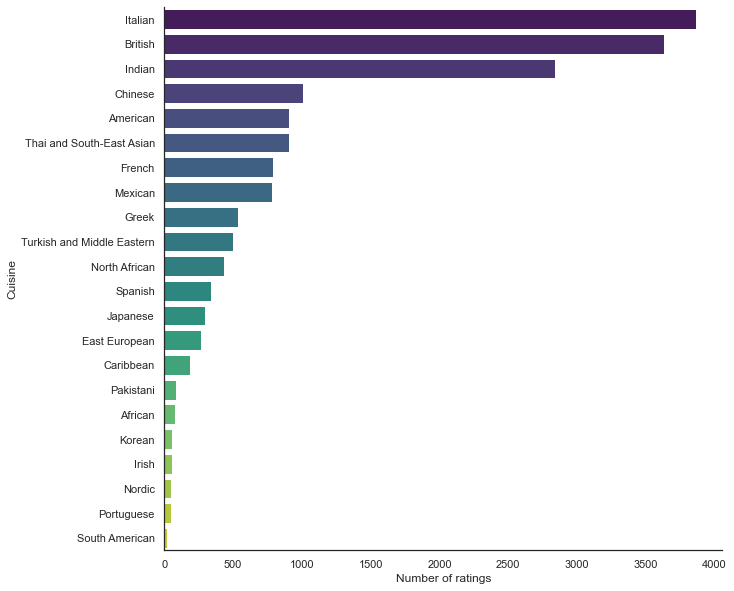

In [146]:
size = (10,10)
fig, ax = plt.subplots(1, 1, figsize = size)

sns.barplot(y= 'Cuisine', x = 'Number of ratings', data = ratings, 
            order = ratings.sort_values('Number of ratings', ascending = False)['Cuisine'],
           palette = 'viridis')
sns.despine()

In [149]:
ratings.corr()

,Average Rating,Number of ratings
Average Rating,1.000000,-0.341062
Number of ratings,-0.341062,1.000000


In [213]:
raw[['prep_time', 'cook_time']].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

,prep_time,cook_time
prep_time,1.000000,-0.115219
cook_time,-0.115219,1.000000


In [151]:
raw.corr()

,rating,rating_count
rating,1.000000,-0.021923
rating_count,-0.021923,1.000000


In [173]:
df1 = raw[['cuisine', 'cook_time', 'prep_time']]
cook_t = pd.pivot_table(df1, columns = ['cuisine'], index = ['cook_time'], aggfunc = 'count').T

In [187]:
cuisines_above_threshold = raw.cuisine.value_counts()[raw.cuisine.value_counts() > 20].index

In [194]:
raw = raw[raw['cuisine'].isin(cuisines_above_threshold)]

In [220]:
df1 = raw[['cuisine', 'cook_time']]
cook_t = pd.pivot(df1, columns = ['cuisine'], values=  ['cook_time'])
cook_t

cook_time                                               \
cuisine  American British     Caribbean Chinese  East European   
4             NaN     NaN           NaN     NaN            NaN   
5             NaN     NaN           NaN     NaN            NaN   
6             NaN     NaN  over 2 hours     NaN            NaN   
9             NaN     NaN  over 2 hours     NaN            NaN   
10            NaN     NaN           NaN     NaN            NaN   
...           ...     ...           ...     ...            ...   
1742          NaN     NaN           NaN     NaN   1 to 2 hours   
1743          NaN     NaN           NaN     NaN  10 to 30 mins   
1745          NaN     NaN           NaN     NaN   over 2 hours   
1746          NaN     NaN           NaN     NaN            NaN   
1747          NaN     NaN           NaN     NaN   1 to 2 hours   

                                                                          \
cuisine             French              Greek             Indian Italian   
4                      NaN                NaN  30 mins to 1 hour     NaN   
5                      NaN                NaN       1 to 2 hours     NaN   
6                      NaN                NaN                NaN     NaN   
9                      NaN                NaN                NaN     NaN   
10       30 mins to 1 hour                NaN                NaN     NaN   
...                    ...                ...                ...     ...   
1742                   NaN                NaN                NaN     NaN   
1743                   NaN                NaN                NaN     NaN   
1745                   NaN                NaN                NaN     NaN   
1746                   NaN  30 mins to 1 hour                NaN     NaN   
1747                   NaN                NaN                NaN     NaN   

                                                                          \
cuisine Japanese Mexican North African Spanish Thai and South-East Asian   
4            NaN     NaN           NaN     NaN                       NaN   
5            NaN     NaN           NaN     NaN                       NaN   
6            NaN     NaN           NaN     NaN                       NaN   
9            NaN     NaN           NaN     NaN                       NaN   
10           NaN     NaN           NaN     NaN                       NaN   
...          ...     ...           ...     ...                       ...   
1742         NaN     NaN           NaN     NaN                       NaN   
1743         NaN     NaN           NaN     NaN                       NaN   
1745         NaN     NaN           NaN     NaN                       NaN   
1746         NaN     NaN           NaN     NaN                       NaN   
1747         NaN     NaN           NaN     NaN                       NaN   

                                    
cuisine Turkish and Middle Eastern  
4                              NaN  
5                              NaN  
6                              NaN  
9                              NaN  
10                             NaN  
...                            ...  
1742                           NaN  
1743                           NaN  
1745                           NaN  
1746                           NaN  
1747                           NaN  

[1696 rows x 15 columns]

In [230]:
df1 = raw[['cuisine', 'cook_time', 'prep_time']]
cook_t = pd.pivot_table(df1, index = ['cuisine'], columns = ['cook_time'], aggfunc = 'count')
cook_t

prep_time                                  \
cook_time                  1 to 2 hours 10 to 30 mins 30 mins to 1 hour   
cuisine                                                                   
American                           11.0          22.0              27.0   
British                            95.0          54.0              97.0   
Caribbean                           4.0          13.0              18.0   
Chinese                             5.0          53.0              13.0   
East European                       6.0          10.0               9.0   
French                             19.0          35.0              34.0   
Greek                               3.0          10.0              15.0   
Indian                             29.0          89.0              85.0   
Italian                            45.0         172.0              84.0   
Japanese                            1.0          12.0               6.0   
Mexican                             8.0          27.0              19.0   
North African                      13.0          10.0              12.0   
Spanish                             4.0          17.0              15.0   
Thai and South-East Asian           3.0          80.0              15.0   
Turkish and Middle Eastern          8.0          18.0              12.0   

                                                                               
cook_time                  less than 10 mins no cooking required over 2 hours  
cuisine                                                                        
American                                 5.0                 2.0         19.0  
British                                  5.0                 NaN        103.0  
Caribbean                                NaN                 NaN          3.0  
Chinese                                 33.0                 NaN          6.0  
East European                            NaN                 NaN          6.0  
French                                   4.0                 NaN         24.0  
Greek                                    1.0                 NaN          3.0  
Indian                                   6.0                 NaN         15.0  
Italian                                 26.0                 3.0         27.0  
Japanese                                 6.0                 1.0          2.0  
Mexican                                  2.0                 1.0          8.0  
North African                            2.0                 NaN         12.0  
Spanish                                  NaN                 NaN          2.0  
Thai and South-East Asian               13.0                 NaN         12.0  
Turkish and Middle Eastern               2.0                 NaN          5.0

In [231]:
df1 = raw[['cuisine', 'cook_time', 'prep_time']]
cook_t = pd.pivot_table(df1, index = ['cuisine'], columns = ['prep_time'], aggfunc = 'count')
cook_t

cook_time                                      \
prep_time                  1-2 hours 30 mins to 1 hour less than 30 mins   
cuisine                                                                    
American                         3.0               6.0              60.0   
British                         22.0              51.0             253.0   
Caribbean                        5.0               6.0              16.0   
Chinese                          4.0               8.0              90.0   
East European                    3.0               3.0              24.0   
French                           3.0              14.0              87.0   
Greek                            4.0               1.0              25.0   
Indian                          15.0              30.0             150.0   
Italian                         18.0              40.0             281.0   
Japanese                         1.0               2.0              22.0   
Mexican                          2.0               2.0              57.0   
North African                    2.0               2.0              41.0   
Spanish                          1.0               2.0              32.0   
Thai and South-East Asian        5.0               7.0              98.0   
Turkish and Middle Eastern       1.0               8.0              26.0   

                                                   
prep_time                  over 2 hours overnight  
cuisine                                            
American                            5.0      12.0  
British                            11.0      17.0  
Caribbean                           3.0       8.0  
Chinese                             2.0       6.0  
East European                       1.0       NaN  
French                              5.0       7.0  
Greek                               NaN       2.0  
Indian                             11.0      18.0  
Italian                             7.0      11.0  
Japanese                            1.0       2.0  
Mexican                             3.0       1.0  
North African                       NaN       4.0  
Spanish                             1.0       2.0  
Thai and South-East Asian           8.0       5.0  
Turkish and Middle Eastern          5.0       5.0

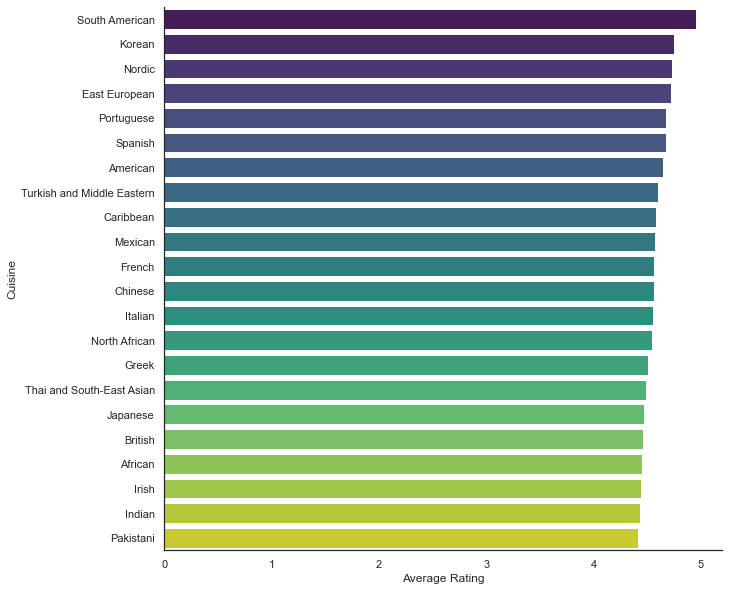

In [209]:
size = (10,10)
fig, ax = plt.subplots(1, 1, figsize = size)

sns.barplot(y= 'Cuisine', x = 'Average Rating', data = ratings, 
            order = ratings.sort_values('Average Rating', ascending = False)['Cuisine'],
           palette = 'viridis')
sns.despine()

# WORDS

In [378]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

ingredients = raw['ingredients'].str.split(',')
ingredients = pd.Series([[x.lower() for x in sublst] for sublst in ingredients])
ing_list = pd.DataFrame(mlb.fit_transform(ingredients), 
                        columns = mlb.classes_, index = ingredients.index)

In [379]:
df = raw.copy()
df.drop(columns = ['ingredients_full', 'name'], inplace = True)

df.head()

,cook_time,cuisine,ingredients,prep_time,rating,rating_count,servings
4,30 mins to 1 hour,Indian,"vegetable oil,onion,sea salt,garlic,cumin,cori...",less than 30 mins,2.223214,112,4
5,1 to 2 hours,Indian,"curry leaves,onions,rapeseed oil,yoghurt,tomat...",30 mins to 1 hour,4.000000,1,6
6,over 2 hours,Caribbean,"mutton,lemon,coriander,black pepper,garlic,oni...",overnight,4.500000,2,4-6
9,over 2 hours,Caribbean,"onions,garlic,chives,white wine vinegar,cloves...",less than 30 mins,4.000000,2,6
10,30 mins to 1 hour,French,"buckwheat flour,egg,butter,ghee,olive oil,blac...",1-2 hours,5.000000,1,4


In [380]:
ing_list['cuisine'] = df['cuisine']

In [381]:
frequencies_cuisines = pd.DataFrame(raw['cuisine'].value_counts(normalize=True) * 100)
frequencies_cuisines.columns = ['relative_count']
frequencies_cuisines['absolute_count'] = raw['cuisine'].value_counts()
frequencies_cuisines

,relative_count,absolute_count
Italian,21.049528,357
British,20.872642,354
Indian,13.207547,224
Thai and South-East Asian,7.252358,123
French,6.839623,116
Chinese,6.485849,110
American,5.070755,86
Mexican,3.832547,65
North African,2.889151,49
Turkish and Middle Eastern,2.653302,45


In [383]:
df = ing_list.groupby('cuisine').apply(sum, 0).drop(columns = ['cuisine'])
df = df.merge(frequencies_cuisines, how = 'inner', right_index = True, left_index = True)

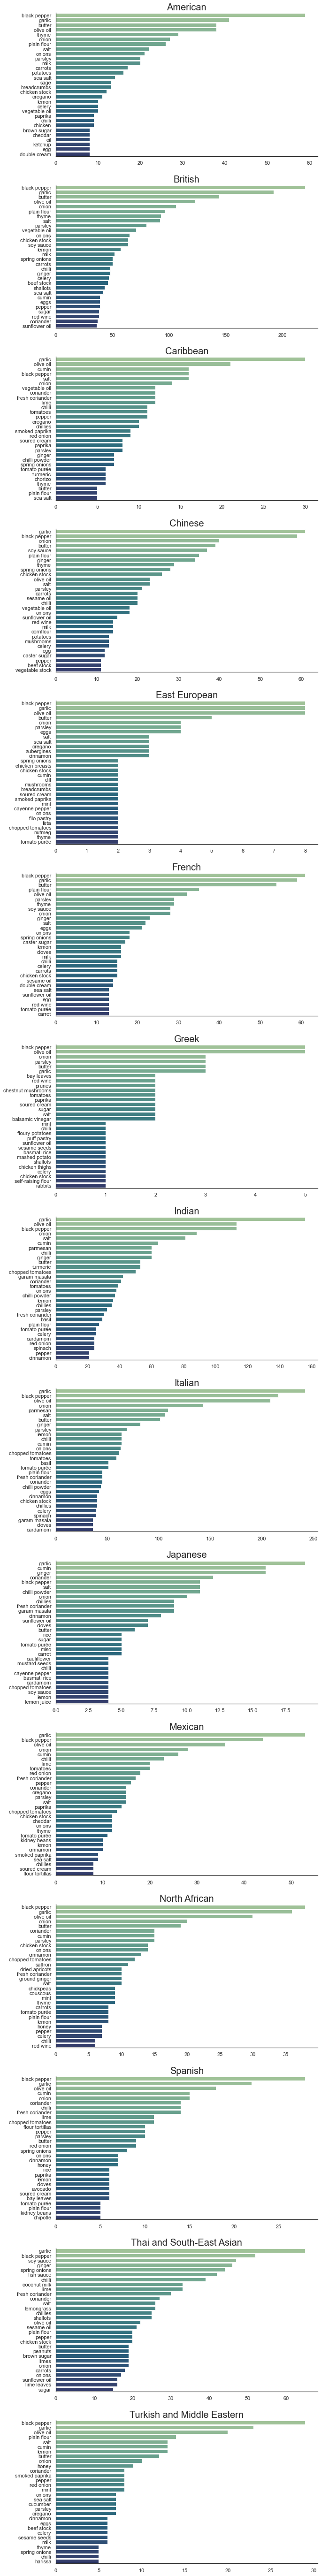

In [385]:

ingredients_dict = {}
figsize = (10,100)
fig, axs = plt.subplots(ncols = 1, nrows = len(df.index), figsize = figsize)
for numb, cuisine in enumerate(df.index):
    df = df.iloc[:, :-2]
    ings = df.loc[cuisine].sort_values(ascending = False)[:30]
    ingredients_dict[cuisine] = ings
    axs[numb] = sns.barplot(y = ingredients_dict[cuisine].index, 
                            x = ingredients_dict[cuisine].values, 
                            ax = axs[numb],
                            palette = "crest")
                            #color = 'darkblue')
    axs[numb].set_title(cuisine, fontsize = 20)
    sns.despine()
    
    
    

In [315]:
len(df.index)

15

In [336]:
type(ingredients_dict['American'])

pandas.core.series.Series

In [338]:
ingredients_dict['American'].values

array([59, 52, 38, 30, 29, 27, 26, 22, 20, 20, 19, 19, 19, 18, 17, 16, 14,
       14, 14, 14, 14, 13, 13, 13, 13, 13, 12, 12, 11, 11], dtype=int64)